# Graph Database Benchmark, Query Performance Results

In [7]:
# Some common initialiasion
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import HTML

pd.set_option ( 'display.max_columns', 500 )

## Queries and Query Categories
As explained in the main README TODO, we have the following queries and query categories.

In [2]:
# DO NOT EDIT MANUALLY! This was generated through: 
# mvn test -Dtest='QueryListTest#testJsonOut'
#
all_queries = {
  "counts": [
    "cnt",
    "cntType",
    "cntRel",
    "cntRelType"
  ],
  "selects": [
    "sel",
    "join",
    "joinRel",
    "joinFilter",
    "joinRe",
    "joinReif"
  ],
  "unions": [
    "2union",
    "2union1Nest",
    "2union1Nest+",
    "pway",
    "exist",
    "existAg"
  ],
  "aggregation": [
    "grp",
    "grpAg",
    "mulGrpAg",
    "nestAg"
  ],
  "paths": [
    "varPathC",
    "varPath",
    "shrtSmf",
    "medSmf",
    "lngSmf"
  ]
}

And we have tested them against different datasets and graph databases:

In [3]:
# Internal ID -> Label used here
datasets = { 
  "biopax": "biopax",
  "arabidopsis": "ara",
  "poaceae": "cereals"
}

# internal ID => Label Used Here
databases = {
  "sparql": "virt",
   "neo": "neo",
   "arcade": "arc"
}

We ran all the queries for each combination of dataset/DB, and produded 1 result file for each of them:

In [4]:
raw_results = {}
for dataset in datasets.keys():
  for db in databases.keys():
    combo = f"{dataset}-{db}"
    raw_res_path = f"{combo}-results.tsv"
    raw_res = pd.read_csv ( raw_res_path, sep = "\t" )
    raw_res.set_index ( "Name", inplace = True, drop = False )
    raw_results [ combo ] = raw_res

## Results summaries
In the tables below, a per-category summary of all the times taken in the various combinations of datasets and databases.

*Note: where the time is 'inf' and sdev is '-', it's because no query succeded to complete before a set timeout of 20s.*

In [5]:
# You can skip the following code if you're interested in the resulting tables only.

# Extracts the queries about a given group
def get_group_data ( raw_data, queries ):
  gdata = raw_data [ raw_data [ 'Name' ].isin ( queries ) ]
  gdata = gdata [ [ 'Name', 'AvgTime', 'STD' ] ] 
  return gdata

# Gets the summary table about a given group of queries
def get_summary_data ( qgroup ):
  gdata = pd.DataFrame ()
  queries = all_queries [ qgroup ]
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo = f"{dataset}-{db}"

      qdata = raw_results [ combo ]
      qdata = get_group_data ( qdata, queries )

      was_empty = gdata.empty
      ylabel = datasets [ dataset ] + "/" + databases [ db ]
      gdata [ ylabel + " Time" ] = qdata [ "AvgTime" ].copy ()
      gdata [ ylabel + " sdev" ] = qdata [ "STD" ].copy ()

      if was_empty:
        gdata.set_index ( qdata [ "Name" ].copy (), inplace = True )
        gdata.index_name = "Queries"
  
  return gdata
  
data_summaries = {}      
for qgroup in all_queries.keys ():
  gdata = get_summary_data ( qgroup )
  data_summaries [ qgroup ] = gdata
  display ( HTML ( f"<h3>Group: {qgroup}</h3>" ) )
  display ( gdata )

,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
cnt,220.441176,7.650242,0.413793,0.494649,177.125874,15.744378,2028.803150,82.886616,0.456140,0.639972,917.713178,8.815996,8943.053097,58.197300,0.295082,1.080928,4896.591241,1539.757800
cntType,3.931034,17.704200,4.700935,5.291886,186.060870,5.155966,3.795455,15.744011,4.214286,5.157685,995.419118,24.277884,71.201681,602.310419,6.947826,4.213270,5072.715517,1571.163041
cntRel,10.192661,0.396210,0.408000,0.493441,554.766667,18.666347,25.056911,3.219563,0.487603,0.579018,3881.508333,48.566336,77.172131,1.231089,0.225000,1.305853,20424.434109,2995.374762
cntRelType,15.489209,28.341951,6.571429,6.282701,7.760274,90.103489,25.148438,39.668725,7.233645,6.242852,0.495413,0.789091,44.257732,132.162170,7.774648,4.683447,0.489583,0.994668


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
sel,6.323529,0.980418,1.177778,0.689653,2.814159,7.815448,3.038760,0.979502,1.057377,0.266572,2.190476,0.677812,3.818841,0.543515,1.383333,2.146654,3.193548,9.658121
join,5.664122,0.708310,2.395161,15.084488,17.535088,1.130274,6.400000,0.861357,1.059829,0.302022,655.873874,7.773050,7.147287,0.469387,1.452381,4.738957,4158.740741,1802.350534
joinRel,7.180952,0.386825,1.442478,0.865387,2.792593,1.072703,10.252101,2.030356,1.475410,0.980918,3.131783,1.127635,12.707143,0.605686,1.639706,3.054257,3.552239,1.235850
joinFilter,5.163636,0.567099,10.860656,0.964798,0.740741,1.071032,4.913793,1.512665,10.522124,1.408503,1.141593,0.924539,5.159292,0.434379,10.500000,4.322578,8.945736,8.300330
joinRe,5.916667,0.791575,11.542373,0.902457,27.408333,4.698464,6.604651,13.665318,11.405405,0.975876,711.323308,78.095081,6.821138,0.713253,11.058824,2.611234,4070.148760,737.270752
joinReif,7.752475,0.555085,1.698113,0.571878,12.571429,83.101385,10.712963,1.260848,2.133333,0.401490,12.348214,75.335013,13.308271,0.653434,3.268293,7.159853,9.661765,5.148492


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
2union,12.563025,0.576939,2.093750,0.788075,34.021277,2.824556,10.568966,1.439953,2.100917,1.254215,26.688000,0.901755,14.250000,0.455200,3.127119,10.226116,47.842105,13.955471
2union1Nest,9.275510,0.471467,15.968000,1.331601,35.360294,11.564744,10.776596,1.108659,19.338710,1.081155,28.500000,14.958802,14.676471,1.127977,29.434783,12.845322,51.604651,20.603936
2union1Nest+,9.488550,2.220071,17.034783,1.990902,34.730496,4.176258,11.094828,2.358992,17.719008,1.324281,27.257143,1.859726,16.053097,16.236995,28.291262,34.118488,49.222222,16.513698
pway,61.452381,1.077829,41.680000,1.771640,141.297521,28.614287,39.323232,1.412974,34.664179,1.232053,712.776786,159.023807,49.883929,0.581169,67.892473,14.867138,3725.034783,1237.572900
exist,14.056075,0.563543,11.015504,0.847648,12.269231,16.206334,19.785714,1.487530,5.543103,0.677492,12.669643,0.809720,141.253623,0.616815,8.025000,14.766225,44.758065,20.835543
existAg,34.396396,0.607218,14.716667,0.980339,47.284404,2.928442,42.780488,1.944039,12.342105,0.762262,57.297030,8.412544,379.893204,0.999143,22.327869,26.320166,116.020202,47.147398


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
grp,6.689655,0.565897,7.238411,0.607822,22.762712,1.791137,7.201613,2.371853,12.237288,16.713615,724.880734,4.837593,346.773109,0.969335,18.345794,4.629892,4704.354331,1628.997152
grpAg,8.583333,1.132731,7.299145,0.698088,6.613861,1.954330,8.319588,0.810689,10.885246,0.919906,7.443478,2.506802,13.067961,12.024699,18.300752,4.339713,14.680412,11.004304
mulGrpAg,50.000000,0.995927,45.274074,2.244162,50.504673,5.151248,29.008403,1.654454,51.971223,1.769068,58.500000,11.618311,376.944444,0.721283,87.000000,17.525625,155.907407,60.228775
nestAg,8.595420,0.617422,7.108911,0.786142,51.229358,3.537191,15.782258,2.062284,10.875969,1.346336,56.308725,2.013130,348.768595,0.680200,18.272727,5.665686,33.392593,15.793016


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
varPathC,8.155039,14.082597,1.781250,1.097395,82.208333,37.487005,10.000000,3.297883,2.039370,1.217606,92.681416,39.223095,9.858333,3.358911,2.798450,5.287633,211.457627,177.929768
varPath,357.793388,10.052294,3.310078,0.647090,67.917355,8.572812,98.305344,2.950601,1.609091,0.591925,70.511628,5.661156,4.214876,0.432177,3.803419,11.332924,131.681034,52.865309
shrtSmf,2.140496,0.348946,0.708333,0.570947,0.409524,1.071441,14.679245,2.765595,2.781513,0.506896,4.052632,6.688839,229.125984,1.657078,3.038095,8.605593,21.293103,8.118703
medSmf,10.211382,0.617398,0.557252,0.556919,0.816667,1.587680,46.255814,6.497931,2.355769,1.525946,2094.091743,38.902666,3148.770992,3.001448,3.962963,11.053741,3312.796610,1290.639625
lngSmf,22.276923,0.622764,0.690000,0.761378,1.333333,1.224143,92.201613,2.482393,35.230159,1.153518,inf,-,17004.155963,29.184018,20.548387,104.261269,inf,-


## Result Charts

We can use the tables above to show the data in bar charts. Again, we're showing one chart per category.

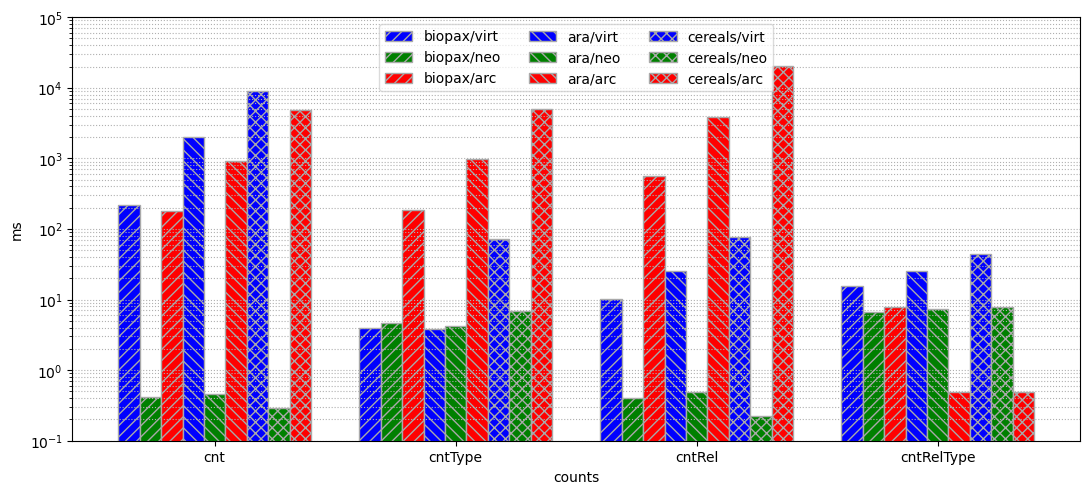

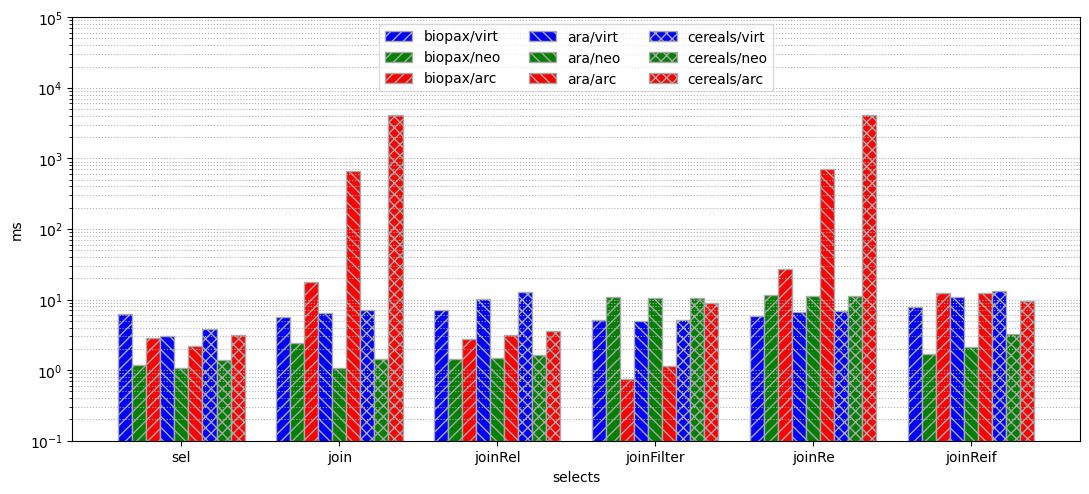

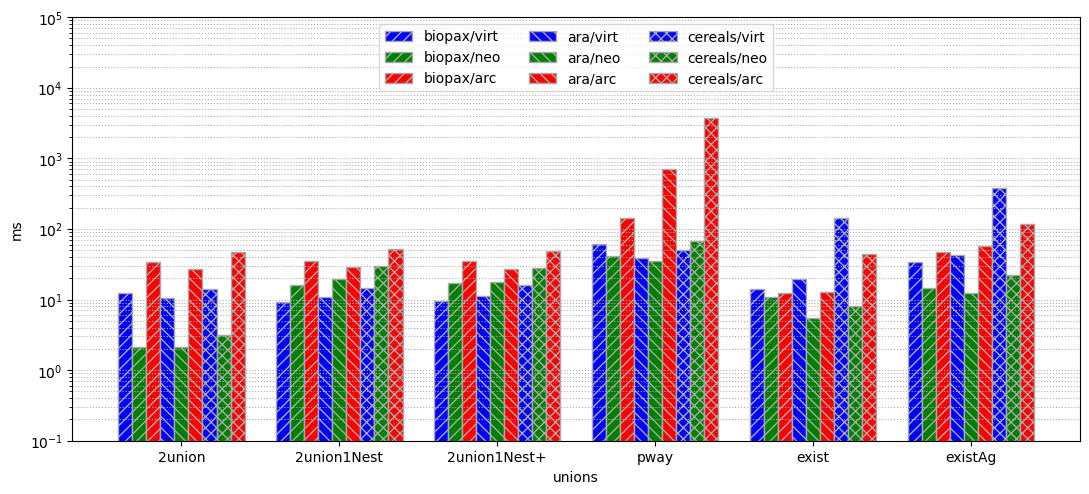

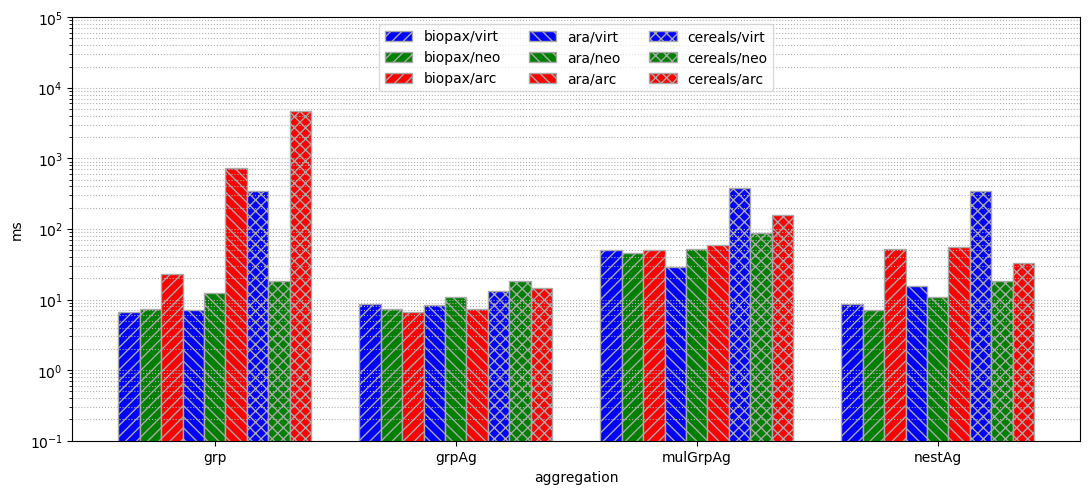

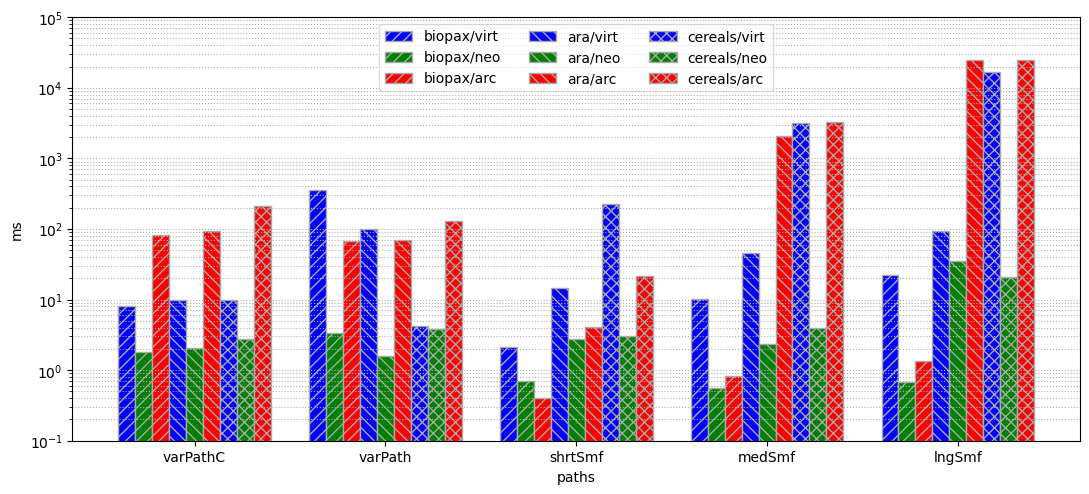

In [6]:
# You can skip the following code if you're interested in the resulting charts only.

from matplotlib.ticker import ScalarFormatter

INF_VALUE = 25E3 # Conventional top value to represent timed out results

# Assigns bar colors based on the DB
def get_db_color ( db ):
  colors = { "sparql": "Blue", "neo": "Green", "arcade": "Red" }
  return colors [ db ]

# Assigns bar hatch patterns based on the dataset 
def get_dataset_hatch ( dset ):
  hatches = { "biopax": "///", "arabidopsis": "\\\\\\", "poaceae": "XXX" }
  return hatches [ dset ]

"""
Gets the x vector to locate the ibar (starts at 0) correctly, assuming you want have nbars 
vertical bars of each of the nlabels labels, and all the bars will take wbar_total units of 
width, where the bar groups (ie, each label) are spaced 1 unit from each other.

Returns (the x vector, the single bar width, the next ibar ).

The method is based on:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

TODO: move to an imported module.
"""
def bar_get_xs ( ibar, nbars, nlabels, wbar_total = 0.8 ):
  x = np.arange ( nlabels )
  # wbar_total = 0.8 # Because x = 0, 1, 2, you've a total of 1
  wbar = wbar_total / nbars 
  xi = x - wbar_total / 2  + wbar / 2 + ibar * wbar
  return (xi, wbar, ibar + 1)

"""
Sets the x ticks that match what was computed by get_bar_xs()
"""
def bar_set_xticks ( ax, nlabels ):
  x = np.arange ( nlabels )
  ax.set_xticks ( x )

"""
Draws the bar chart for a given query group
"""
def group_chart ( qgroup ):
  gdata = data_summaries [ qgroup ]
    
  # In these cases, all queries timed out
  gdata = gdata.replace ( np.inf, INF_VALUE ) 

  fig, ax = plt.subplots()
  nbars = len ( datasets.keys () ) * len ( databases.keys() )
  nlabels = len ( gdata.index )
  ibar = 0
    
  for dataset in datasets.keys ():
    for db in databases.keys():
      combo_prefx = datasets [ dataset ] + "/" + databases [ db ]
      ylabel = combo_prefx
      
      yid = combo_prefx + " Time"
      y = gdata [ yid ]

      # Tried to show errors, but the log scale distorts and confuse things, plus
      # <1 values yield errors
      #yerr_id = combo_prefx + " sdev"
      #yerr = gdata [ yerr_id ].tolist ()
        
      ycolor = get_db_color ( db )
      yhatch = get_dataset_hatch ( dataset )

      xi, wbar, ibar = bar_get_xs ( ibar, nbars, nlabels )
        
      ax.bar ( xi, y, width = wbar, label = ylabel, 
        color = ycolor, edgecolor = "DarkGrey", hatch = yhatch, log = True )

  bar_set_xticks ( ax, nlabels )
  ax.set_xticklabels ( gdata.index )

  ax.set_xlabel ( qgroup )
  ax.set_ylabel ( "ms" )

  # To cope with y = 0 in log scale and to have the same range in each chart
  ax.set_ylim ( ymin = 0.1, ymax = 1E5 )

  # No sci notation, but 10000 takes more space
  #ax.yaxis.set_major_formatter ( ScalarFormatter () ) 

  ax.grid ( axis = "y", which = "both", linestyle = 'dotted' )

  ax.legend ( loc = "upper center", ncol = 3, framealpha = 0.7 );
    
  # Give it a good size
  ax.figure.set_size_inches ( 13, 5.5 )

  # And save!
  img_fmt = "svg"
  ax.figure.savefig ( f"querying-results-{qgroup}." + img_fmt, format = img_fmt )  


for qgroup in all_queries.keys ():
  group_chart ( qgroup )

## Some Analysis
* On average, all have reasonable performance, with most results in the order of 100s.
* Neo4j is the fastest in a number of cases, but Virtuoso performs well too.
* All DBs scale well, except Gremlin/ArcadeDB for the cases where performance is more sensitive to the way in which the queries are written (see below).
* the counting queries varies a lot, presumably because certain whole graph data (eg, no. of nodes and edges are stored in databases like Neo4j). 
* The selections are the fastest, most homogeneous and mostly scalable
  * in this group, 'join' and 'joinRe' are similar and simple joins, and they're similar to other join queries in the group. The major difference is that the Gremlin traversal in the faster queries limits the results to be returned ( `limit( 100 )` step or filtering steps) at the beginning of the traversal pattern. This shows that automatic Gremlin optimisation isn't as available as for other languages and the query writer has to take more care of writing optimised queries.
* Apart from the 'counts' group, aggregations, unions and paths/traversal queries are the slowest. This matches other benchmarks (TODO:REF) and the fact this kind of queries are notoriously hard to optimise, and/or require to deal with much data.
* Neo4j performs well with semantic motif queries, which are essentially chain paths. It's perhaps surprising that the combination of Gremlin and ArcadeDB are slow and not scalable with such queries. By comparing the `shortSmf` case with the other two (`medSmf`, `lngSmf`) the main differences are that there aren't variable-lenght relation patterns, and that the volume of matched data is increasingly higher. This confirms the considerations made for the join queries.
